# Smoking Analysis

Sklearn can be very useful for data analysis in Python/Jupyter

## Information obtained from Kaggle

#### Project done by Miguel Estrada

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [3]:
#Importing the data
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [4]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of children per person')

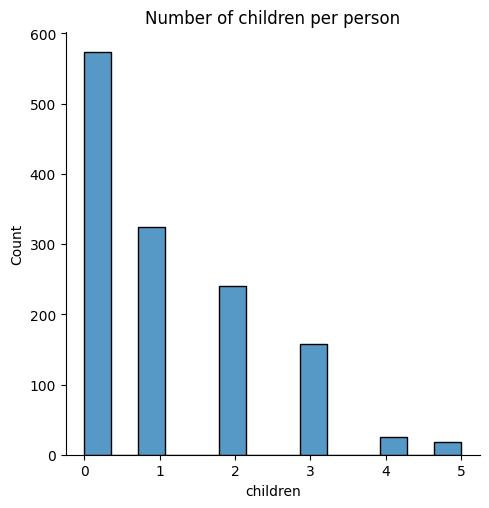

In [11]:
sns.displot(insurance_df['children'], kde=False)
plt.title("Number of children per person")

<Axes: xlabel='age', ylabel='children'>

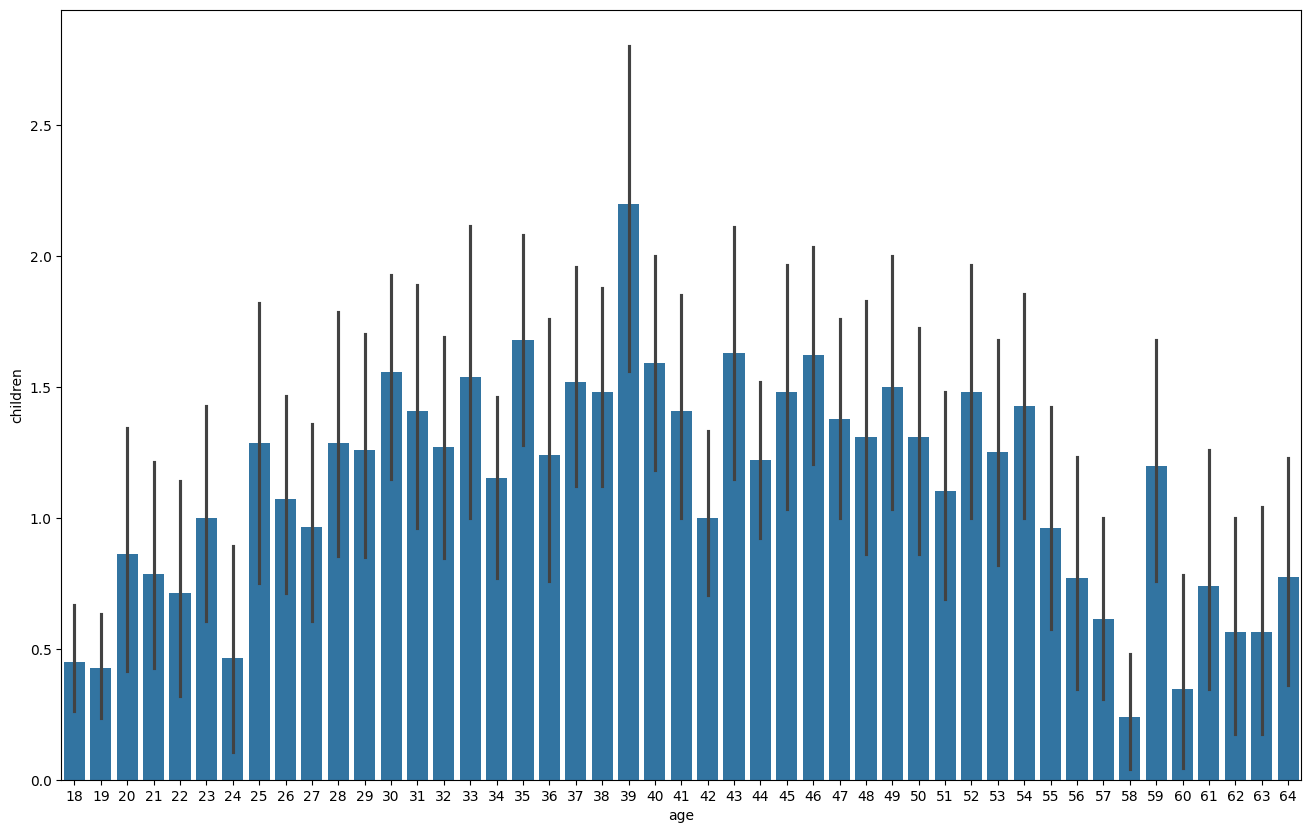

In [18]:
plt.figure(figsize=(16, 10))
sns.barplot(x=insurance_df['age'], y=insurance_df['children'])

#### Preparing data for Logistic Regression
Used for predicting if a person is a smoker or not based on their insurance and other data

In [77]:
X = insurance_df.drop('smoker', axis=1)
Y = insurance_df['smoker']

In [96]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

Y = np.array(Y)
Y = labelencoder.fit_transform(Y)

X.region = labelencoder.fit_transform(X.region.values)
X.sex = labelencoder.fit_transform(X.sex.values)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [98]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [99]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [100]:
predictions = classifier.predict(x_test)

<Axes: >

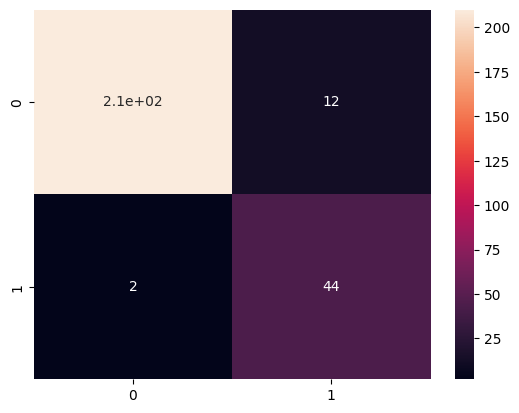

In [101]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

## There is a very big precision due to the correlation in the data

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       222
           1       0.79      0.96      0.86        46

    accuracy                           0.95       268
   macro avg       0.89      0.95      0.92       268
weighted avg       0.96      0.95      0.95       268



In [103]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mean_squared_error_ = mean_squared_error(y_test, predictions)
r2_score_ = r2_score(y_test, predictions)
mean_absolute_error_ = mean_absolute_error(y_test, predictions)

print("Mean Squared Error: {}".format(mean_squared_error_))
print("R2 score: {}".format(r2_score_))
print("Mean Absolute Error: {}".format(mean_absolute_error_))

Mean Squared Error: 0.05223880597014925
R2 score: 0.6325891108499804
Mean Absolute Error: 0.05223880597014925


In [104]:
## Accuracy of the model
accuracy_score(y_test, predictions)

0.9477611940298507